# Imports

In [425]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Housing data

In [426]:
data = pd.read_csv('AmesHousing.tsv', delimiter='\t')

In [427]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

# Helper functions

In [429]:
def transform_features(df):
    return df

In [430]:
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

In [431]:
def train_and_test(df):
    # Numeric only
    train = df.iloc[:1460].select_dtypes(include=['float', 'integer'])
    test = df.iloc[1460:].select_dtypes(include=['float', 'integer'])
    
    lr = LinearRegression()
    lr.fit(train.drop(columns='SalePrice'), train['SalePrice'])
    predict = lr.predict(test.drop(columns='SalePrice'))
    
    mse = mean_squared_error(predict, test['SalePrice'])
    return np.sqrt(mse) # RMSE

In [432]:
def pipe():
    df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
    return train_and_test(select_features(transform_features(df)))

In [433]:
# Using only Gr Liv Area
transform_df = transform_features(data)
feature_df = select_features(transform_df)
rmse = train_and_test(feature_df)
rmse

57088.25161263909

In [434]:
pipe()

57088.25161263909

# Data cleaning

## Fill missing

Which columns contain less than 5% missing values?

In [435]:
data.isnull().sum().value_counts()

0       55
1        7
159      4
80       3
23       2
2        2
490      1
2917     1
83       1
81       1
2358     1
2732     1
157      1
1422     1
2824     1
dtype: int64

In [436]:
total_rows = data.shape[0]
na_count = data.isnull().sum()
low_na_cols = na_count[(na_count / total_rows < 0.05)].index
low_na_cols

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
 

Fill these with mode

In [437]:
data[low_na_cols].isnull().sum().sum()

461

In [438]:
num_low_na_cols = data[low_na_cols].select_dtypes(include=['integer', 'float'])
for i, col in enumerate(num_low_na_cols):
    data[col] = data[col].fillna(data[col].mode().iloc[0]) # Since there are multiple modes for each column, just choose first one
data[num_low_na_cols.columns].isnull().sum().value_counts()

0    37
dtype: int64

In [439]:
data.isnull().sum().value_counts()

0       64
159      4
80       3
490      1
2917     1
83       1
81       1
2358     1
2732     1
157      1
23       1
1422     1
2824     1
1        1
dtype: int64

## Drop columns

In [440]:
# Drop columns with more thatn 5% missing
high_na_counts = na_count[(na_count / total_rows > 0.05)].index
data = data.drop(columns=high_na_counts)

In [441]:
data.isnull().sum().value_counts()

0     64
80     3
83     1
81     1
23     1
1      1
dtype: int64

In [442]:
# Drop string columns with any missing values
missing_strings = data.select_dtypes(include='object').isnull().sum()
data = data.drop(columns=missing_strings[missing_strings != 0].index)

In [443]:
# Check for any remaining null values
data.isnull().sum().value_counts()

0    64
dtype: int64

In [444]:
# These columns are not useful
data = data.drop(columns=['PID', 'Order'])

# These are too coorelated to final price for this purpose
data = data.drop(columns=["Mo Sold", "Sale Condition", "Sale Type"])

## Rework columns

In [445]:
data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [446]:
# Age of house when sold
age = data['Yr Sold'] - data['Year Built']

# Years since last remodel
last_remod = data['Yr Sold'] - data['Year Remod/Add']

data = data.drop(columns=['Year Built', 'Year Remod/Add', 'Yr Sold'])

In [447]:
age[age < 0]

2180   -1
dtype: int64

In [448]:
last_remod[last_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [449]:
# Add these as features
data['age'] = age
data['last remod'] = last_remod
data = data.drop([2180, 1702, 2181]) # Drop negatives

In [450]:
data.shape

(2927, 58)

## Update transform

In [451]:
def transform_features(df):
    data = df.copy()
    total_rows = data.shape[0]
    
    # Fill missing
    na_count = data.isnull().sum()
    low_na_cols = na_count[(na_count / total_rows < 0.05)].index
    num_low_na_cols = data[low_na_cols].select_dtypes(include=['integer', 'float'])
    for i, col in enumerate(num_low_na_cols):
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    
    # Drop columns
    high_na_counts = na_count[(na_count / total_rows > 0.05)].index
    data = data.drop(columns=high_na_counts)
    missing_strings = data.select_dtypes(include='object').isnull().sum()
    data = data.drop(columns=missing_strings[missing_strings != 0].index)
    data = data.drop(columns=['PID', 'Order'])
    data = data.drop(columns=["Mo Sold", "Sale Condition", "Sale Type"])
    
    # Rework columns
    age = data['Yr Sold'] - data['Year Built']
    last_remod = data['Yr Sold'] - data['Year Remod/Add']
    data = data.drop(columns=['Year Built', 'Year Remod/Add', 'Yr Sold'])
    data['age'] = age
    data['last remod'] = last_remod
    data = data.drop([2180, 1702, 2181])
    
    return data

In [452]:
transform_features(pd.read_csv("AmesHousing.tsv", delimiter="\t")).shape

(2927, 58)

In [453]:
pipe()

55275.36731241307

# Feature Selection

## Coorelation

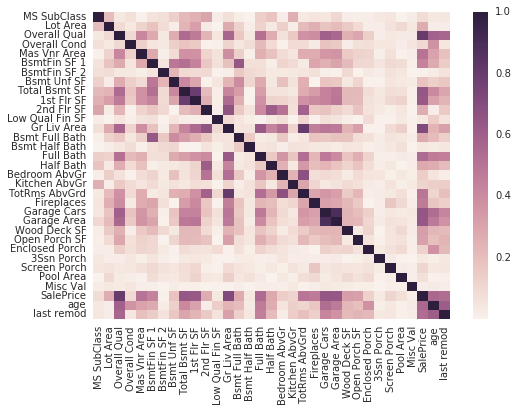

In [454]:
num_data = data.select_dtypes(include=['integer', 'float'])
corr = num_data.corr().abs()
sns.heatmap(corr)

In [455]:
price_corr = corr['SalePrice']

Keep only above 0.4

In [456]:
price_corr[price_corr >= 0.4].index

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'SalePrice', 'age', 'last remod'],
      dtype='object')

In [457]:
data = data.drop(columns=price_corr[price_corr < 0.4].index)

In [458]:
data.shape

(2927, 39)

## Categorical

In [459]:
# Categorical data
cats = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [460]:
# Cat columns still with us
cats_present = []
for column in cats:
    if column in data.columns:
        cats_present.append(column)
cats_present

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [461]:
unique_counts = data[cats_present].apply(lambda col: len(col.unique()))

In [462]:
high_cat_cols = unique_counts[unique_counts > 10].index # Going to drop cat columns with more than 10 categories
data = data.drop(columns=high_cat_cols)

In [463]:
data.shape

(2927, 36)

In [464]:
data.dtypes

MS Zoning         object
Street            object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Overall Qual       int64
Roof Style        object
Roof Matl         object
Mas Vnr Area     float64
Exter Qual        object
Exter Cond        object
Foundation        object
BsmtFin SF 1     float64
Total Bsmt SF    float64
Heating           object
Heating QC        object
Central Air       object
1st Flr SF         int64
Gr Liv Area        int64
Full Bath          int64
Kitchen Qual      object
TotRms AbvGrd      int64
Functional        object
Fireplaces         int64
Garage Cars      float64
Garage Area      float64
Paved Drive       object
SalePrice          int64
age                int64
last remod         int64
dtype: object

In [465]:
# Make rest of columns categories
string_cols = data.select_dtypes(include=['object']).columns

for col in string_cols:
    data[col] = data[col].astype('category')

In [466]:
data.dtypes

MS Zoning        category
Street           category
Lot Shape        category
Land Contour     category
Utilities        category
Lot Config       category
Land Slope       category
Condition 1      category
Condition 2      category
Bldg Type        category
House Style      category
Overall Qual        int64
Roof Style       category
Roof Matl        category
Mas Vnr Area      float64
Exter Qual       category
Exter Cond       category
Foundation       category
BsmtFin SF 1      float64
Total Bsmt SF     float64
Heating          category
Heating QC       category
Central Air      category
1st Flr SF          int64
Gr Liv Area         int64
Full Bath           int64
Kitchen Qual     category
TotRms AbvGrd       int64
Functional       category
Fireplaces          int64
Garage Cars       float64
Garage Area       float64
Paved Drive      category
SalePrice           int64
age                 int64
last remod          int64
dtype: object

In [467]:
# Now make dummy code the rest

dummies = pd.get_dummies(data[string_cols])
data = pd.concat([data, dummies], axis=1)

In [468]:
data.shape

(2927, 152)

In [469]:
transform_features(pd.read_csv("AmesHousing.tsv", delimiter="\t")).shape

(2927, 58)

## Update select features

In [470]:
def select_features(df):
    
    # Coorelation
    num_data = df.select_dtypes(include=['integer', 'float'])
    corr = num_data.corr().abs()
    price_corr = corr['SalePrice']
    price_corr[price_corr >= 0.4].index
    df = df.drop(columns=price_corr[price_corr < 0.4].index)
    
    
    # Categorical
    unique_counts = df[cats_present].apply(lambda col: len(col.unique()))
    high_cat_cols = unique_counts[unique_counts > 10].index # Going to drop cat columns with more than 10 categories
    df = df.drop(columns=high_cat_cols)
    string_cols = df.select_dtypes(include=['object']).columns
    for col in string_cols:
        df[col] = df[col].astype('category')
    dummies = pd.get_dummies(df[string_cols])
    df = pd.concat([df, dummies], axis=1)
    
    return df

In [471]:
select_features(transform_features(pd.read_csv("AmesHousing.tsv", delimiter="\t"))).select_dtypes(include=['float', 'integer']).shape

(2927, 130)

# Train and Test

In [472]:
data['Bldg Type'].dtype

CategoricalDtype(categories=['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], ordered=False)

In [473]:
data.shape

(2927, 152)

In [477]:
def train_and_test(df, k):

    # Holdout valid
    if k == 0:
        train = df.iloc[:1460].select_dtypes(include=['float', 'integer'])
        test = df.iloc[1460:].select_dtypes(include=['float', 'integer'])
        
        lr = LinearRegression()
        lr.fit(train.drop(columns='SalePrice'), train['SalePrice'])
        predict = lr.predict(test.drop(columns='SalePrice'))

        mse = mean_squared_error(predict, test['SalePrice'])
        return np.sqrt(mse) # RMSE
     
    # Simple cross valid
    elif k == 1:
        fold_one = df.iloc[:1460].select_dtypes(['float', 'integer'])
        fold_two = df.iloc[1460:].select_dtypes(['float', 'integer'])
        
        lr = LinearRegression()
        rmses = []
        
        # Fold_one
        lr.fit(fold_one.drop(columns='SalePrice'), fold_one['SalePrice'])
        predict = lr.predict(fold_two.drop(columns='SalePrice'))
        rmses.append(np.sqrt(mean_squared_error(predict, fold_two['SalePrice'])))
        
        # Fold_two
        lr.fit(fold_two.drop(columns='SalePrice'), fold_two['SalePrice'])
        predict = lr.predict(fold_one.drop(columns='SalePrice'))
        rmses.append(np.sqrt(mean_squared_error(predict, fold_one['SalePrice'])))
        
        return np.mean(rmses)
    
    elif k > 1:
        df = df.select_dtypes(['float', 'integer'])
        kf = KFold(n_splits=k, shuffle=True)
        lr = LinearRegression()
        
        mses = cross_val_score(lr, df.drop(columns='SalePrice'), df['SalePrice'], scoring='neg_mean_squared_error', cv=kf)
        avg_rmse = np.mean(np.sqrt(abs(mses)))
        
        return avg_rmse

In [475]:
def pipe(k):
    df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
    return train_and_test(select_features(transform_features(df)), k)

In [476]:
pipe(0)

33367.287183402834

In [478]:
pipe(1)

30261.21283411377

In [480]:
pipe(4)

28806.3803977981